# Credit Card Analysis

Zaki Syaiful Hunafa

RMT-018

## 1. Introduction

Cardiovascular disease (CVD) is a group of conditions that affect the heart and blood vessels. It is one of the leading causes of death worldwide and a significant burden on global health systems. CVD includes coronary artery disease, heart failure, stroke, and other conditions that damage the heart and blood vessels. Risk factors for CVD include high blood pressure, high cholesterol, diabetes, smoking, obesity, and physical inactivity. Due to changes in lifestyle and diet, CVD has become a critical issue to tackle in the modern world. Preventing and managing CVD requires early detection and intervention, making accurate prediction of CVD outcomes a crucial area of research.

Objective:
To correctly predict as many positive cases (patients with heart disease) as possible with the following goals:

 - The model will predict death due to heart disease using the given data.
 - To find the best `recall`
 - We implement Random Forest Classifier in machine learning algorithms to train and test the model on the given dataset.
 - Predicting death due to heart disease is relevant to improving patient outcomes and reducing the burden of CVD on global health systems.
 - The model will be developed and evaluated within a fixed timeframe.


Hence, we aim to develop a predictive model that can accurately identify patients at high risk of dying due to heart disease. This will enable early intervention and improve patient outcomes.

## 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# split model
from sklearn.model_selection import train_test_split

# Handle Outliers
from feature_engine.outliers import Winsorizer

# To Encode Categorical Column
from sklearn.preprocessing import OneHotEncoder

# To Scalling Numerical Column
from sklearn.preprocessing import MinMaxScaler

# handle imbalance target
import imblearn
from imblearn.over_sampling import SMOTENC

# Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier

# Create pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ibp

# Metrics
from sklearn import metrics

# Transform column
from sklearn.compose import make_column_transformer as mct

# Save model
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1G3_zaki.csv')

In [3]:
# first 10 rows of the data
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


In [4]:
# last 10 rows of the data
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


From the above dataset, here is the description of each column:

Name | Definition
---|---
`age` | Age in years
`anaemia ` | Decrease of red blood cells or hemoglobin (boolean)
`creatinine_phosphokinase` | Level of the CPK enzyme in the blood (mcg/L)
`diabetes ` | If the patient has diabetes (boolean)
`ejection_fraction ` | Percentage of blood leaving the heart at each contraction (percentage)
`high_blood_pressure ` |  If the patient has hypertension (boolean)
`platelets ` | Platelets in the blood (kiloplatelets/mL)
`serum_creatinine ` | Level of serum creatinine in the blood (mg/dL)
`serum_sodium` | Level of serum sodium in the blood (mEq/L)
`sex ` | Woman or man (binary)
`smoking` | If the patients smokes or not
`time` | Follow-up period (days)
`DEATH_EVENT` | Percentage of the patient die 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.shape

(299, 13)

In this dataset, there are `299 rows` of data and `13 columns`

In [7]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


There is no duplciated data found on the dataset

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


The given data contains information on 299 patients, including their age, various medical conditions, and some other parameters. Here is a summary of the data:

 - Age: The average age of the patients is 60.8 years, with a standard deviation of 11.9 years. The minimum age is 40 years and the maximum age is 95 years.
 - Anaemia: About 43% of patients have anaemia.
 - Creatinine phosphokinase: The mean value is 581.8, with a standard deviation of 970.3. The minimum value is 23 and the maximum value is 7861.
 - Diabetes: About 42% of patients have diabetes.
 - Ejection fraction: The mean ejection fraction is 38.1%, with a standard deviation of 11.8%. The minimum value is 14% and the maximum value is 80%.
 - High blood pressure: About 35% of patients have high blood pressure.
 - Platelets: The mean value is 263,358, with a standard deviation of 97,804. The minimum value is 25,100 and the maximum value is 850,000.
 - Serum creatinine: The mean value is 1.4, with a standard deviation of 1.0. The minimum value is 0.5 and the maximum value is 9.4.
 - Serum sodium: The mean value is 136.6, with a standard deviation of 4.4. The minimum value is 113 and the maximum value is 148.
 - Sex: About 65% of patients are male.
 - Smoking: About 32% of patients are smokers.
 - Time: The mean follow-up period is 130.3 days, with a standard deviation of 77.6 days. The minimum period is 4 days and the maximum period is 285 days.
 - Death event: About 32% of patients experienced a death event during the follow-up period.

## 4. Exploratory Data Analysis (EDA)

In [11]:
# Define category and numerical column
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

cat_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [12]:
# On this part I will focus to explore the patient who died 
df_died = df[df['DEATH_EVENT'] == 1]
df_died.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1


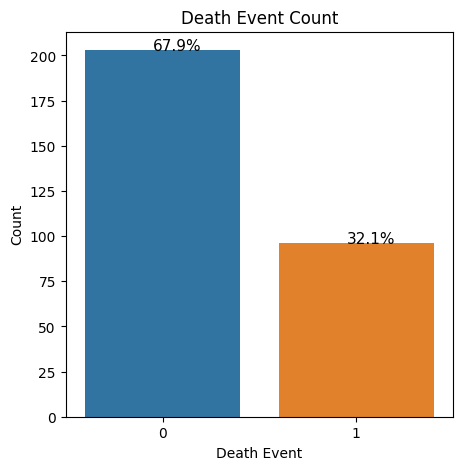

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(df, x='DEATH_EVENT')
plt.title('Death Event Count')
plt.xlabel('Death Event')
plt.ylabel('Count')
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 11)
plt.show()

There is imbalanced data on the target data which patient that passed away because of heart disease just make up 32.1% of the total population compare to patient who doesn't which alomst 70%

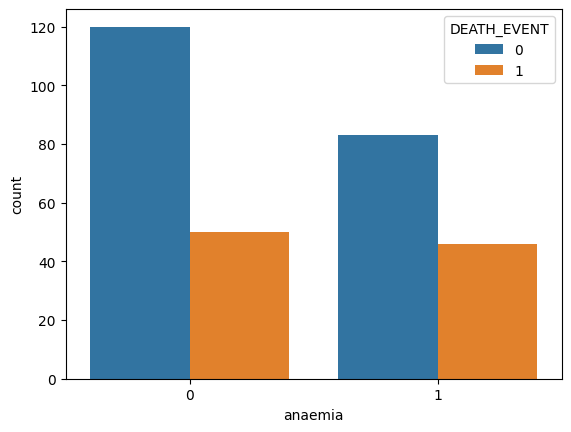

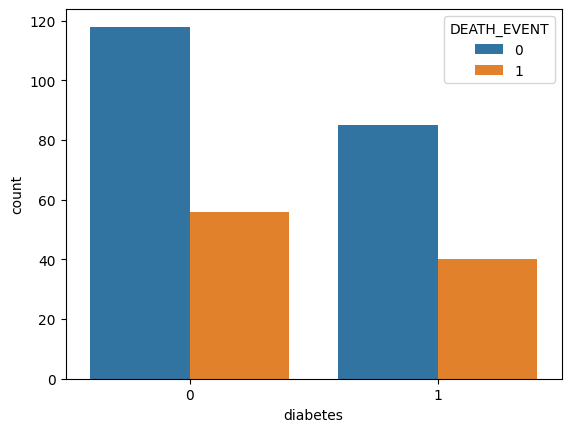

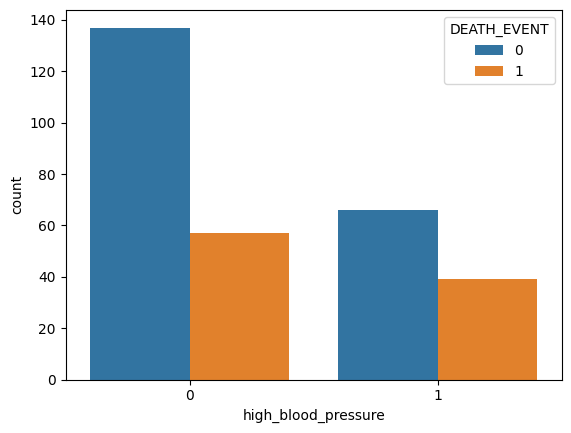

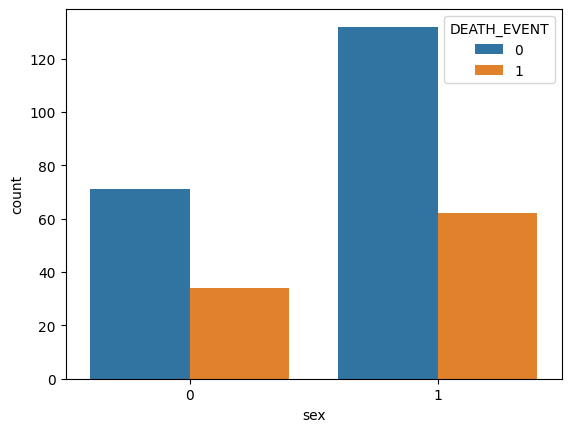

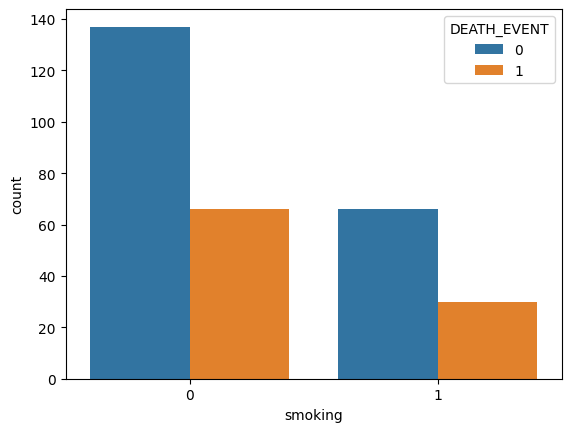

In [14]:
# anaemia
cat = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
for i in cat:
    sns.countplot(data=df, x=i, hue='DEATH_EVENT')
    plt.show()

* Anaemia:
Anaemia is a medical condition characterized by a low red blood cell count or a low hemoglobin level. In the dataset analyzed, 47.9% of patients with anaemia died due to CVD. This suggests that anaemia may be a significant risk factor for CVD-related deaths. One possible explanation for this is that anaemia reduces the amount of oxygen that reaches the tissues, which can lead to damage and inflammation. This inflammation can then contribute to the development of CVDs.

* Diabetes:
Diabetes is a medical condition characterized by high blood sugar levels. In the dataset analyzed, 41.7% of patients with diabetes died due to CVD. This suggests that diabetes is also a significant risk factor for CVD-related deaths. One possible explanation for this is that diabetes can cause damage to the blood vessels, which can then lead to the development of CVDs.

* Hypertension:
Hypertension is a medical condition characterized by high blood pressure. In the dataset analyzed, 40.6% of patients with hypertension died due to CVD. This suggests that hypertension is also a significant risk factor for CVD-related deaths. One possible explanation for this is that high blood pressure can cause damage to the blood vessels and increase the workload on the heart, which can then lead to the development of CVDs.

* Gender:
In the dataset analyzed, 64.6% of male patients died due to CVD. This suggests that gender is a significant risk factor for CVD-related deaths. One possible explanation for this is that males tend to have higher levels of testosterone, which can contribute to the development of CVDs. Additionally, males may engage in riskier behaviors such as smoking and excessive alcohol consumption, which can further increase the risk of CVDs.

* Smoking:
In the dataset analyzed, 31.3% of smokers died due to CVD. This suggests that smoking is also a significant risk factor for CVD-related deaths. One possible explanation for this is that smoking can cause damage to the blood vessels, increase blood pressure, and reduce the amount of oxygen that reaches the tissues, which can then lead to the development of CVDs.

* Conclusion:
This report highlights the significant impact of several risk factors on the likelihood of a patient dying from CVD. Anaemia, diabetes, hypertension, male gender, and smoking were identified as significant risk factors. Healthcare providers and patients should be aware of these risk factors and take appropriate steps to manage them to reduce the likelihood of developing CVDs and related complications.

In [15]:
df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

<Figure size 2000x1000 with 0 Axes>

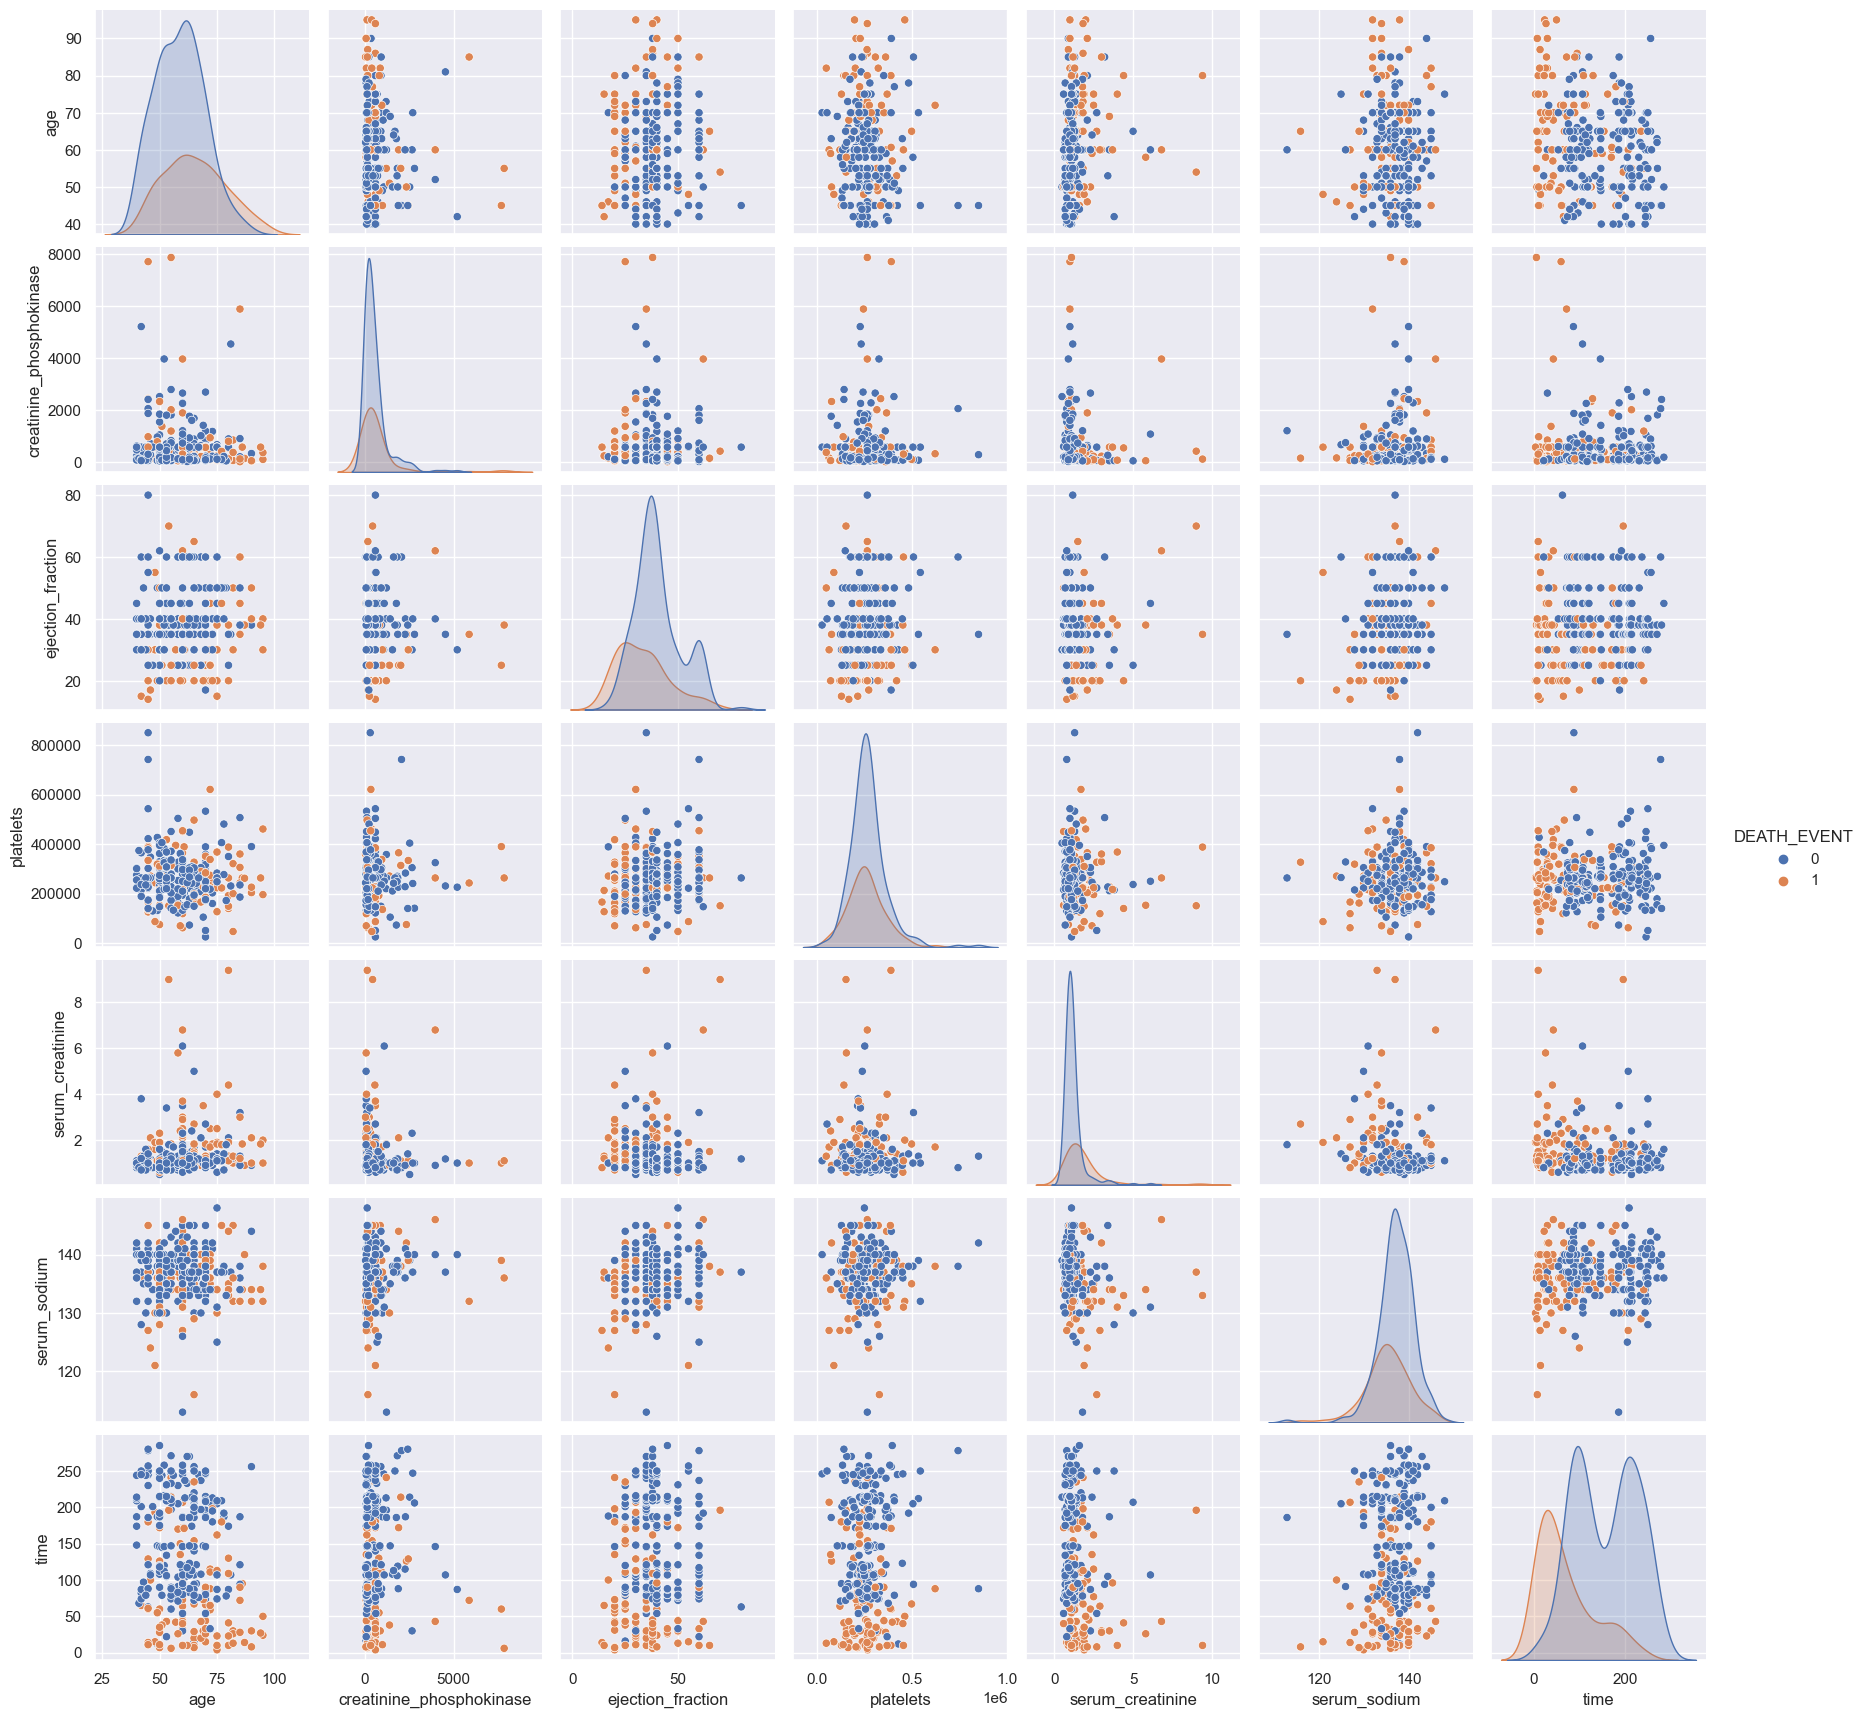

In [16]:
temp = num_cols + ['DEATH_EVENT']

plt.figure(figsize=(20, 10))
sns.set(font_scale=1.0)
sns.pairplot(df[temp], hue='DEATH_EVENT', palette="deep") 
plt.show()



the distribution of each features in the dataset are fairly normal even some are skewed with the extreme to the right/ the left. each of the numerical features is seemed to less correlated to each other.

<Axes: >

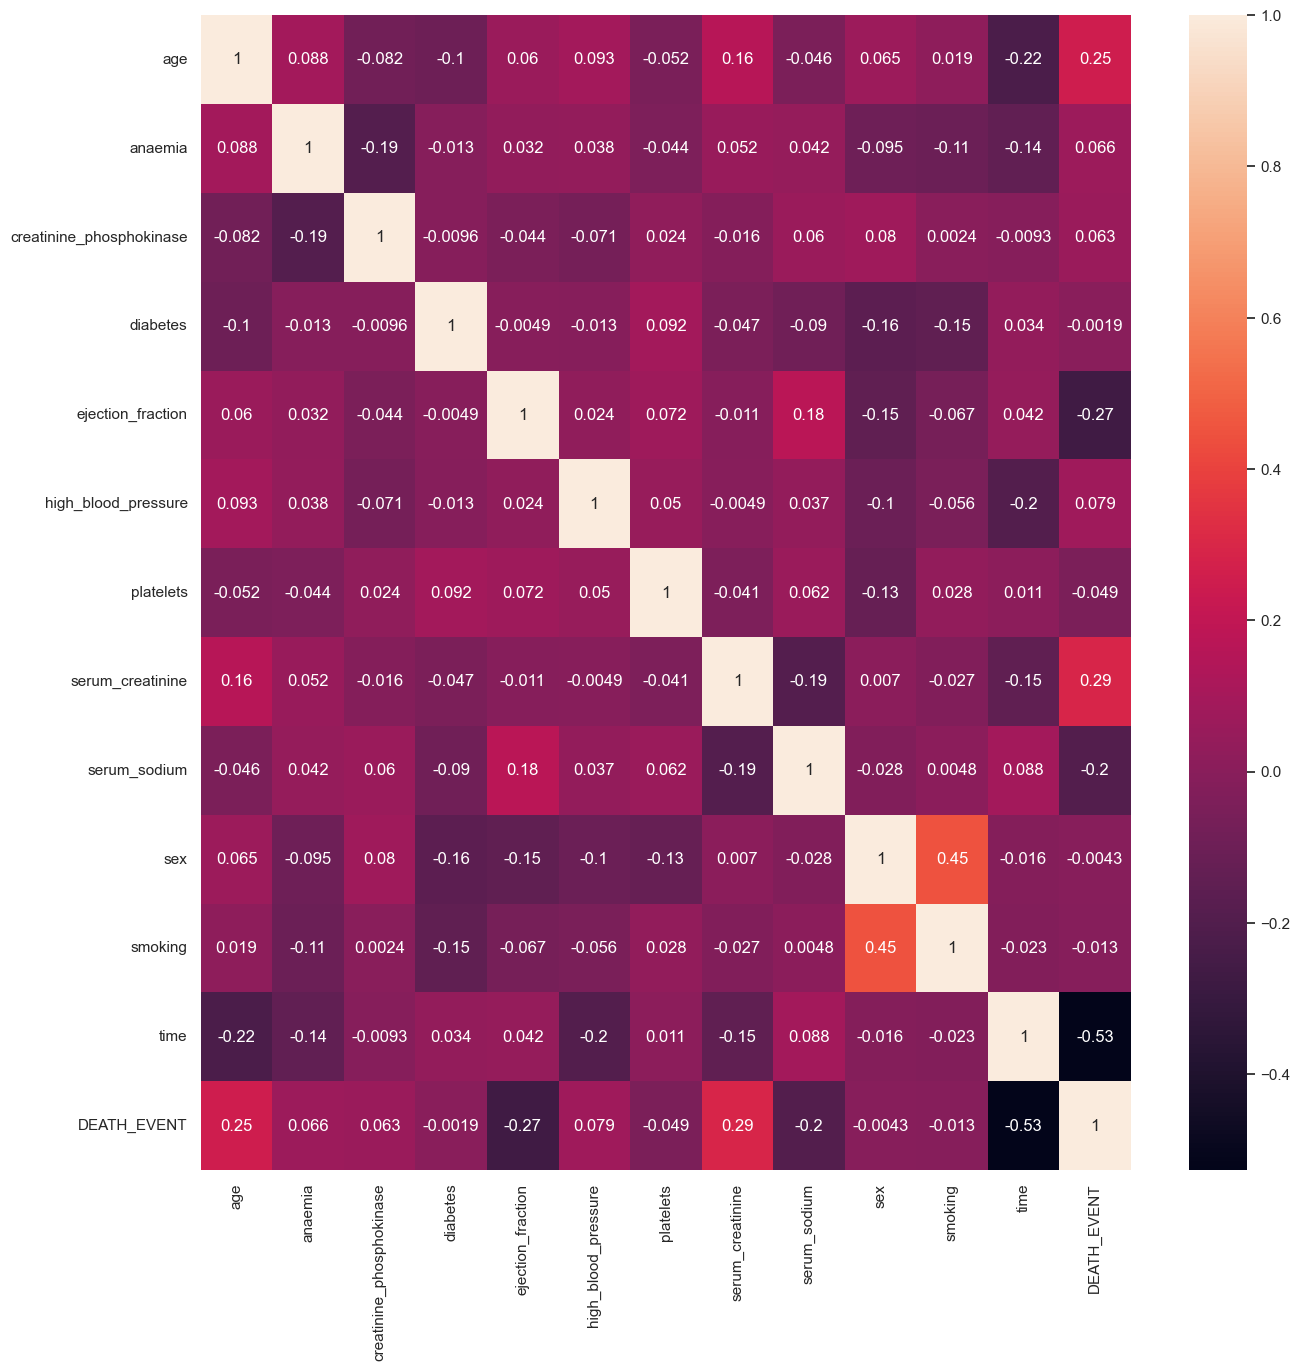

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

Here, age and serum_creatine are positively correlated towards the target. Meaninng, the higher the age or the serum_creatine is the higher the possibility of someone would die of deart disease

## 5. Data Preprocessing

In [18]:
df = df.rename({'DEATH_EVENT': 'death'}, axis=1)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


### Split Train-set and Test-set

In [19]:
X = df.drop(['death'], axis=1)
y = df[['death']]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (239, 12)
Test Size:  (60, 12)


#### Handling Outliers

In [21]:
def plot_dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()

# skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

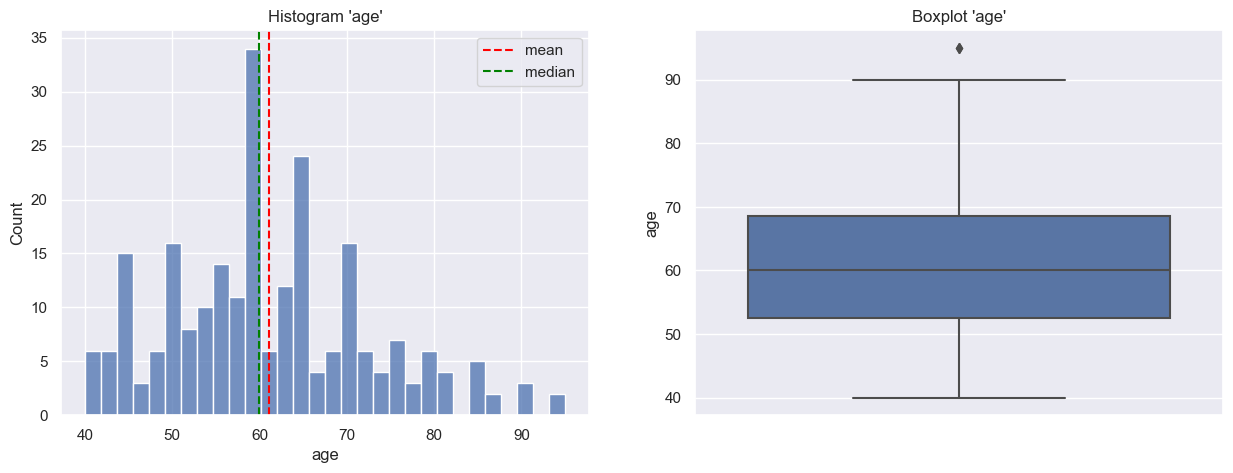

age Kurtosis: -0.03441671142406966
age Skewness: 0.44712692258325665
Columns 'age' normal distribution


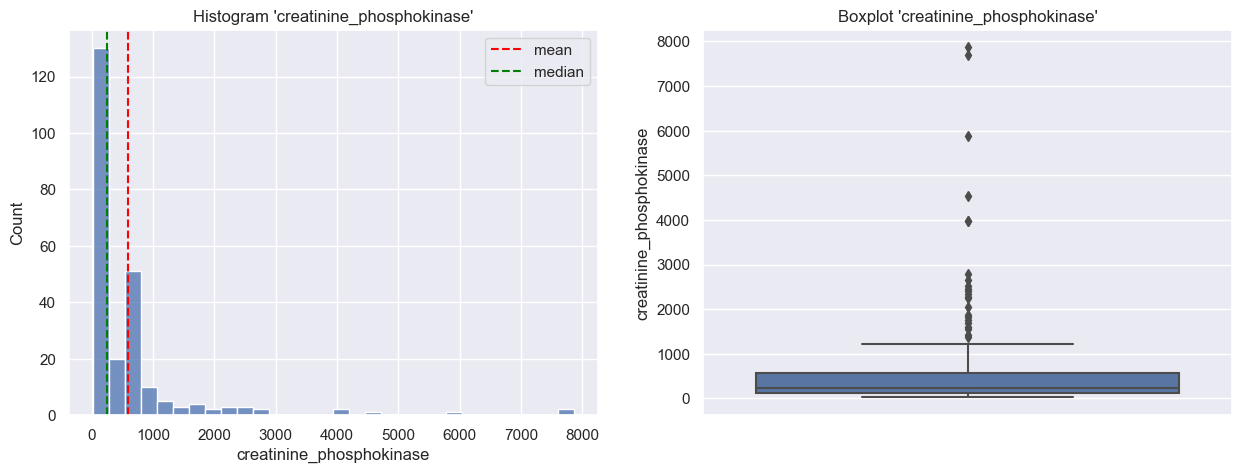

creatinine_phosphokinase Kurtosis: 25.48188697678359
creatinine_phosphokinase Skewness: 4.529728122831618
Columns 'creatinine_phosphokinase' right skewed


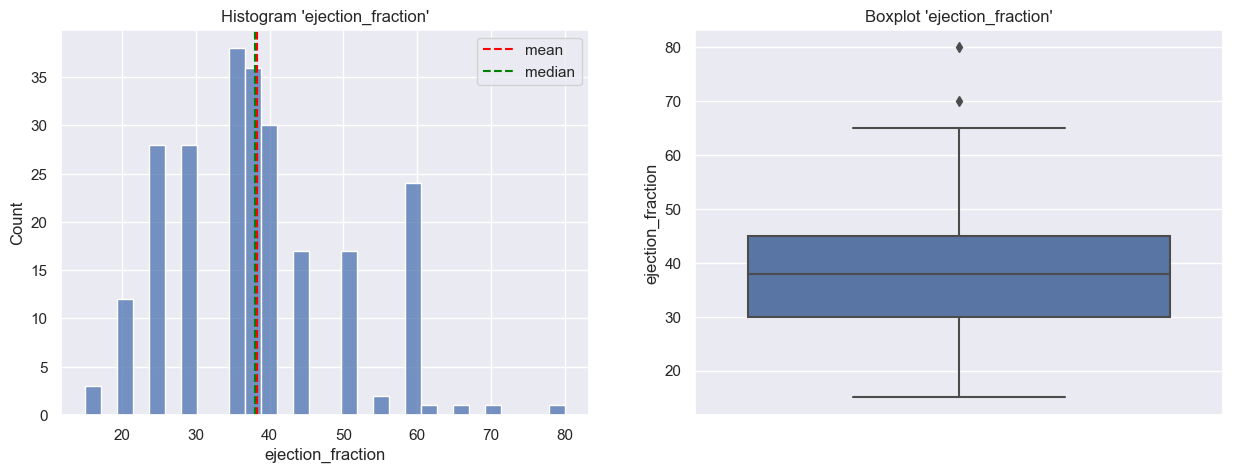

ejection_fraction Kurtosis: 0.2674206261457739
ejection_fraction Skewness: 0.6186318456388594
Columns 'ejection_fraction' right skewed


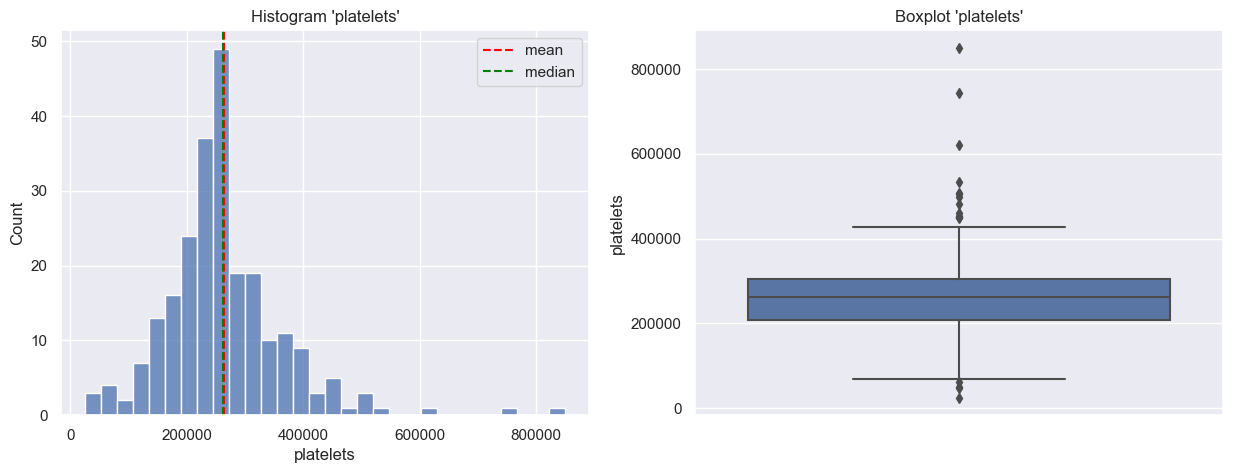

platelets Kurtosis: 6.049874528224451
platelets Skewness: 1.495208126888116
Columns 'platelets' right skewed


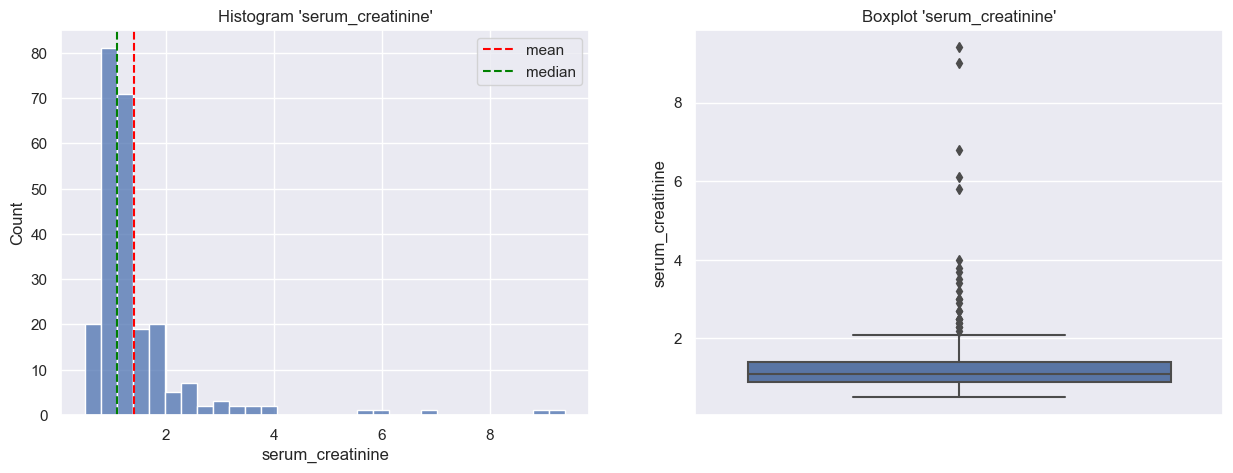

serum_creatinine Kurtosis: 26.19964043567663
serum_creatinine Skewness: 4.56800091934696
Columns 'serum_creatinine' right skewed


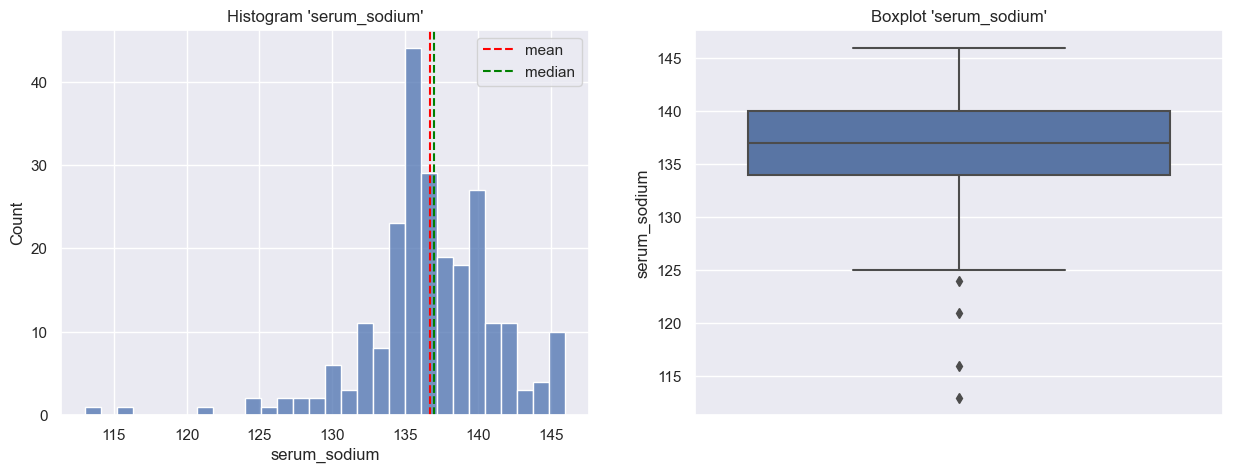

serum_sodium Kurtosis: 4.371041086289544
serum_sodium Skewness: -1.2286876735004173
Columns 'serum_sodium' left skewed


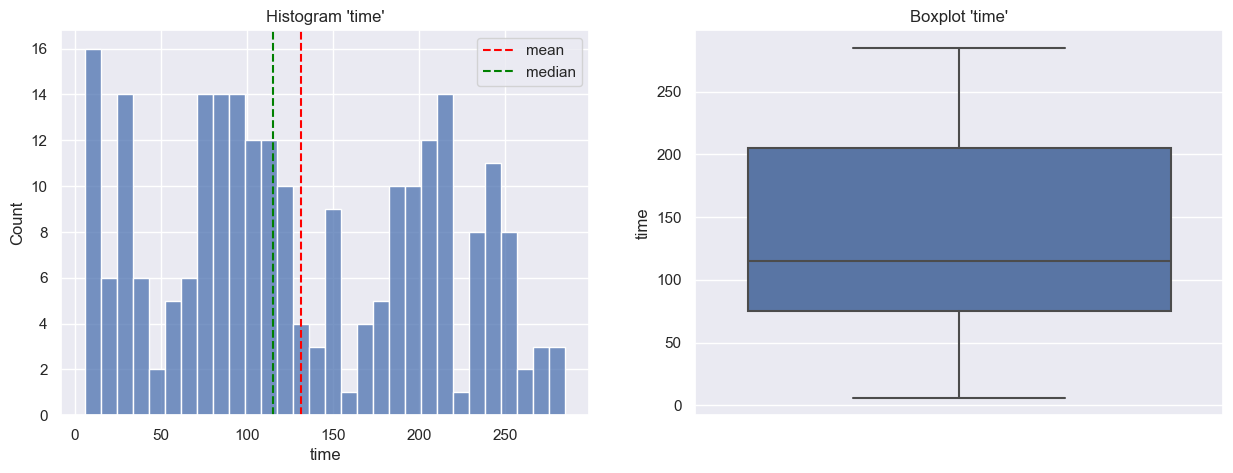

time Kurtosis: -1.178033273091762
time Skewness: 0.12543436925986307
Columns 'time' normal distribution


In [22]:
# checking the distribution of limit_balance
for i in num_cols:
    plot_dist(X_train, i)

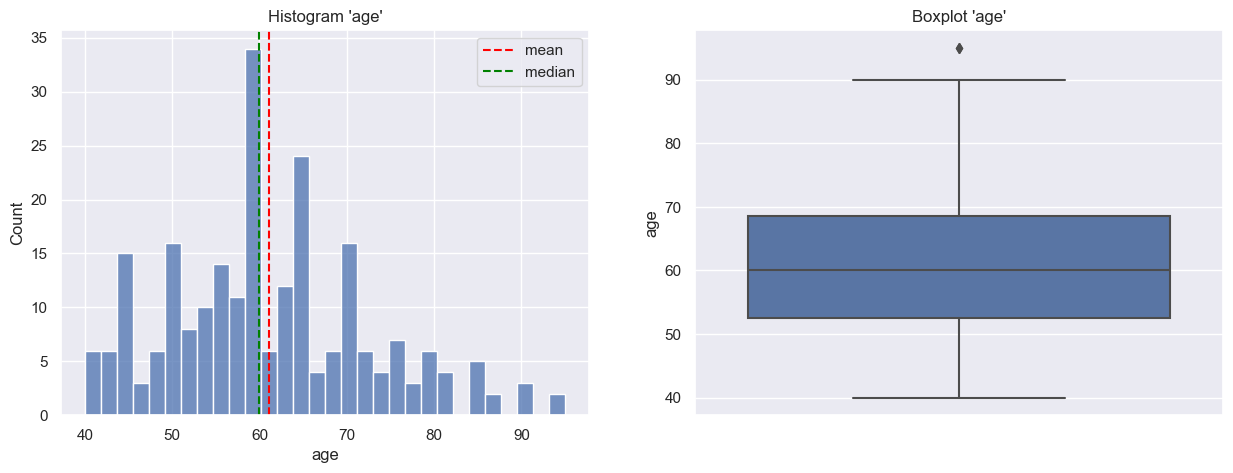

age Kurtosis: -0.03441671142406966
age Skewness: 0.44712692258325665
Columns 'age' normal distribution


In [23]:
# checking the distribution of age
plot_dist(X_train, 'age')

In [24]:
# handling outliers
wins = Winsorizer(capping_method= 'iqr', tail='both', fold=1.5, variables=num_cols)
X_train_new = wins.fit_transform(X_train)

def outlier_analysis(X_train,col):
  skewness = X_train[col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = X_train[col].mean() + 3*X_train[col].std()
    lower = X_train[col].mean() - 3*X_train[col].std()
  else:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = X_train[(X_train[col]>=lower) & (X_train[col]<=upper)]
  outliers = X_train[(X_train[col]<lower) | (X_train[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/df.shape[0] * 100, '%')
  print('percentage of skewness from',i,':', X_train[col].skew())
  print('')
  return outliers,no_outliers, upper, lower

for i in list(X_train.columns):
  outlier_analysis(X_train,i)


percentage outlier from age : 0.0 %
percentage of skewness from age : 0.44712692258325665

percentage outlier from anaemia : 0.0 %
percentage of skewness from anaemia : 0.22883586629116204

percentage outlier from creatinine_phosphokinase : 2.0066889632107023 %
percentage of skewness from creatinine_phosphokinase : 4.529728122831618

percentage outlier from diabetes : 0.0 %
percentage of skewness from diabetes : 0.3858527123277872

percentage outlier from ejection_fraction : 0.33444816053511706 %
percentage of skewness from ejection_fraction : 0.6186318456388594

percentage outlier from high_blood_pressure : 0.0 %
percentage of skewness from high_blood_pressure : 0.7048920599726168

percentage outlier from platelets : 1.0033444816053512 %
percentage of skewness from platelets : 1.495208126888116

percentage outlier from serum_creatinine : 1.6722408026755853 %
percentage of skewness from serum_creatinine : 4.56800091934696

percentage outlier from serum_sodium : 1.0033444816053512 %
per

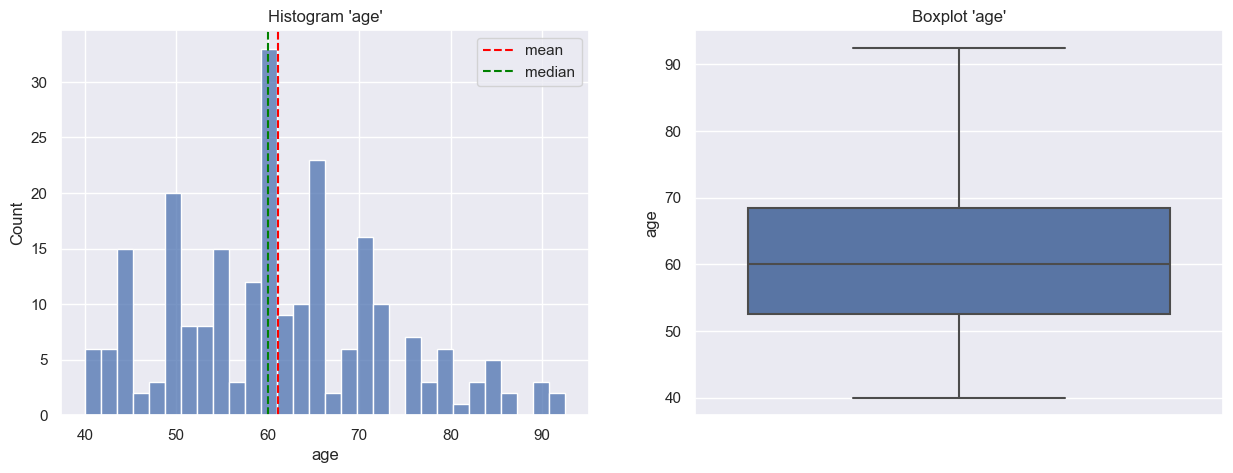

age Kurtosis: -0.13366036045121543
age Skewness: 0.4164400895567571
Columns 'age' normal distribution


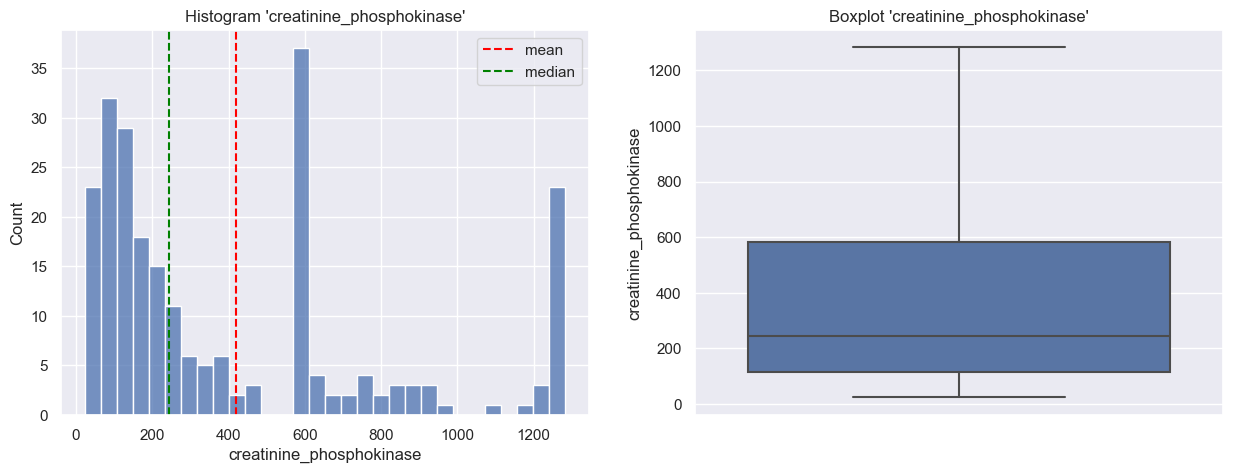

creatinine_phosphokinase Kurtosis: 0.04223425741764508
creatinine_phosphokinase Skewness: 1.0892778263422829
Columns 'creatinine_phosphokinase' right skewed


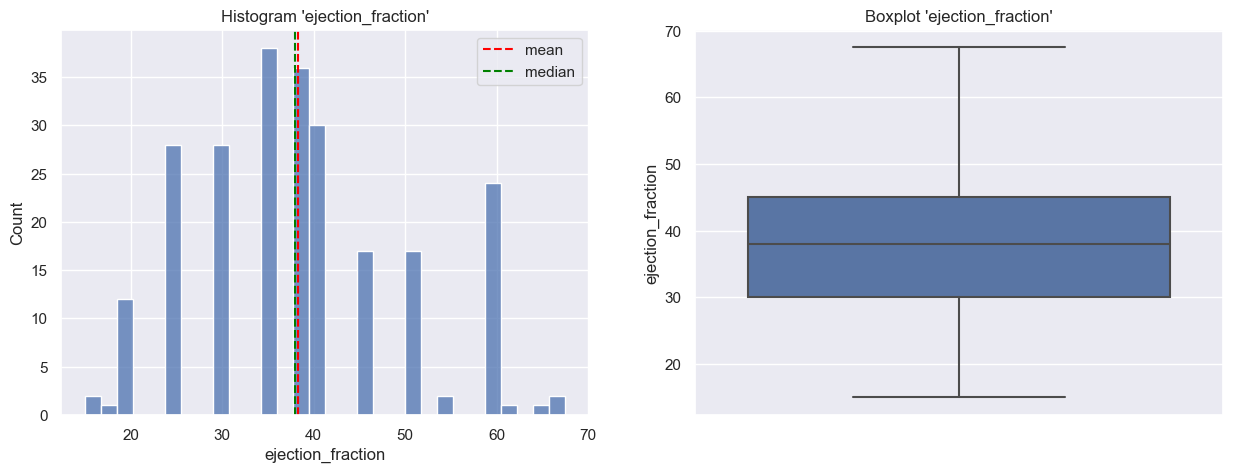

ejection_fraction Kurtosis: -0.1528060911785838
ejection_fraction Skewness: 0.5107421072746431
Columns 'ejection_fraction' right skewed


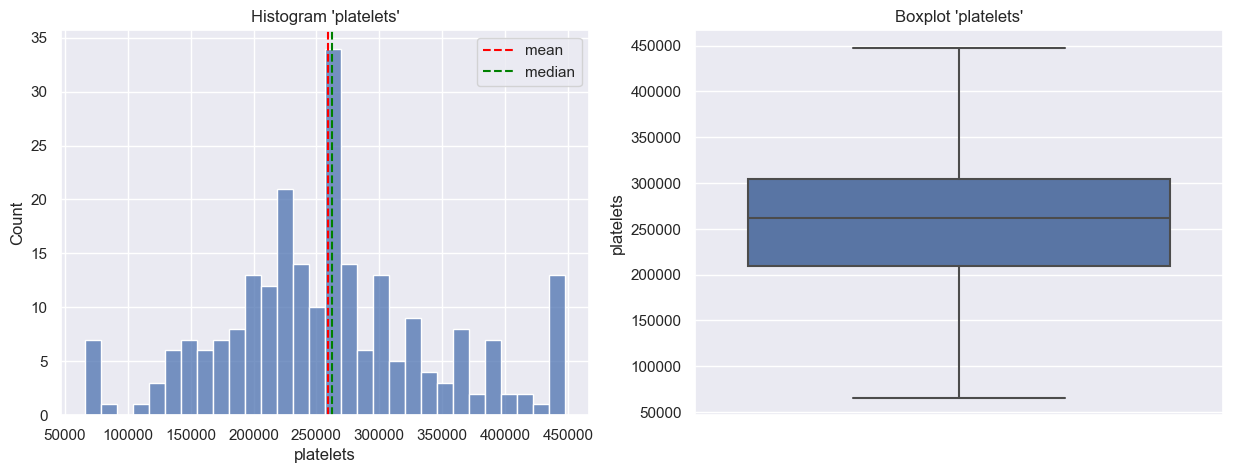

platelets Kurtosis: 0.062692668016183
platelets Skewness: 0.2683184899236796
Columns 'platelets' normal distribution


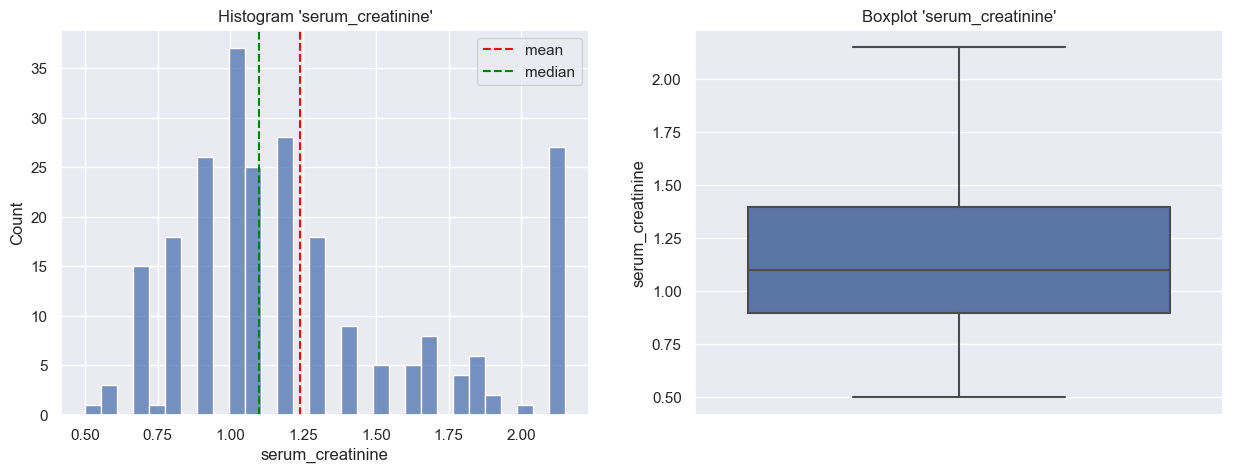

serum_creatinine Kurtosis: -0.23151924304685778
serum_creatinine Skewness: 0.8809783616389613
Columns 'serum_creatinine' right skewed


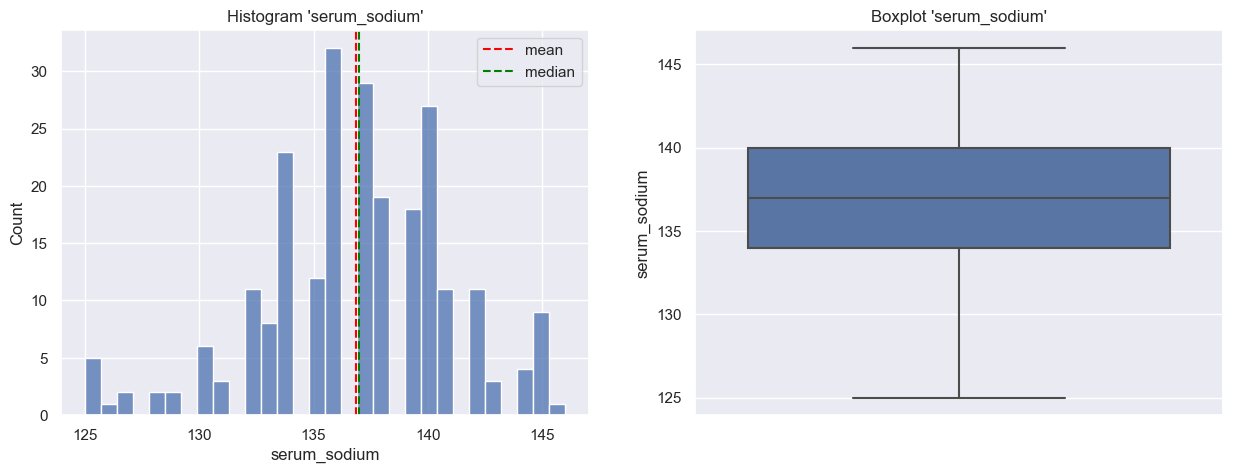

serum_sodium Kurtosis: 0.5239036353445505
serum_sodium Skewness: -0.4421916351924569
Columns 'serum_sodium' normal distribution


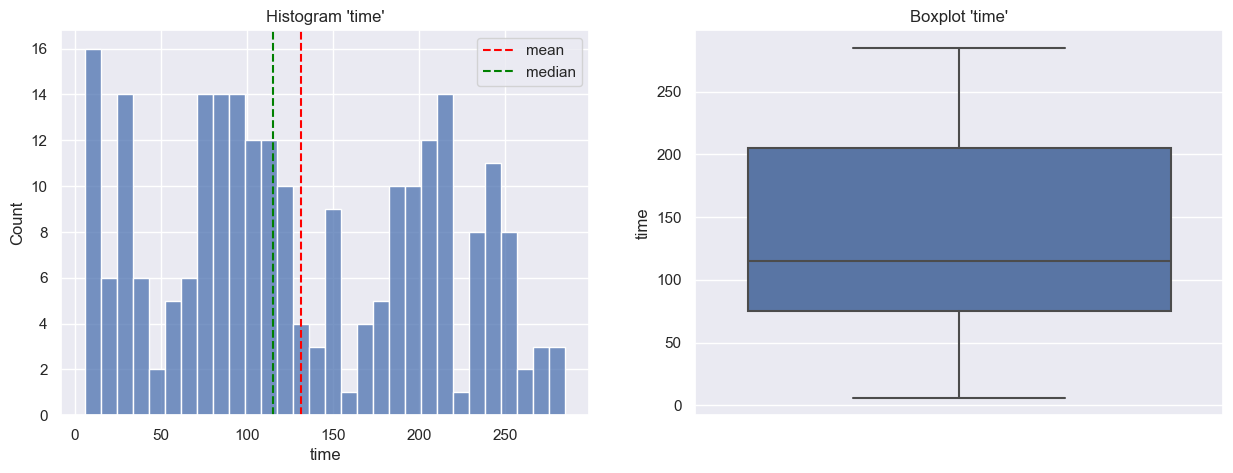

time Kurtosis: -1.178033273091762
time Skewness: 0.12543436925986307
Columns 'time' normal distribution


In [25]:
# checking the distribution of limit_balance after outliers handle
for i in num_cols:
    plot_dist(X_train_new, i)

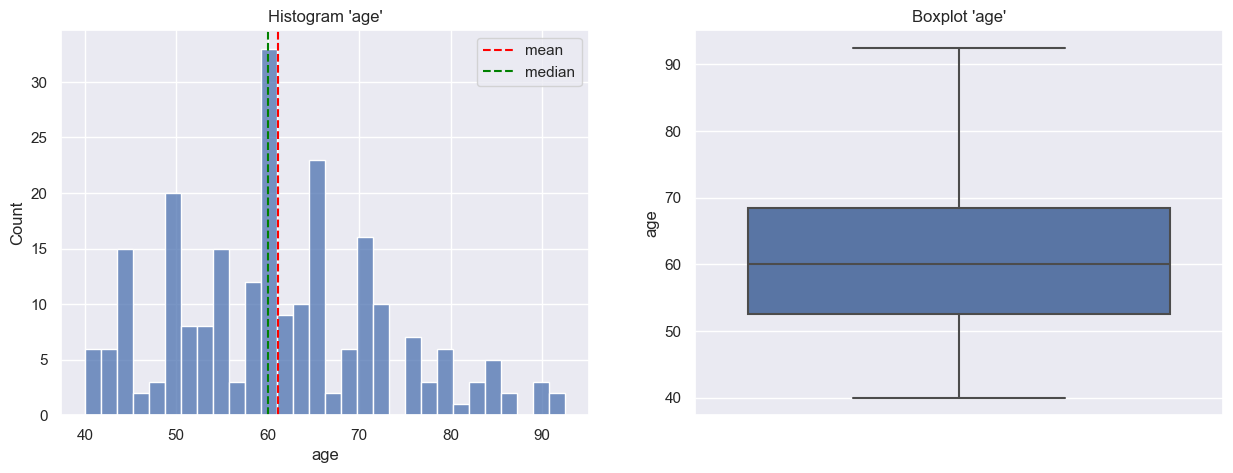

age Kurtosis: -0.13366036045121543
age Skewness: 0.4164400895567571
Columns 'age' normal distribution


In [26]:
# checking the distribution of age after outliers handle
plot_dist(X_train_new, 'age')

#### Split Numerical and Categorical Features

In [27]:
# Define Train-set and Test-set
# X-set for Numerical Column
X_train_num = X_train_new[num_cols]
X_test_num = X_test[num_cols]

# X-set for Categorical Column
X_train_cat = X_train_new[cat_cols]
X_test_cat = X_test[cat_cols]


#### Scalled Num Columns

In [28]:
# Feature Scalling using MniMaxScaller
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Encoding Category

In [29]:
ohe = OneHotEncoder(handle_unknown= 'ignore',sparse=False)
ohe.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [30]:
# Assign to Train-set and Test-set
X_train_cat_encoded = ohe.transform(X_train_cat)
X_test_cat_encoded = ohe.transform(X_test_cat)

In [31]:
cat_cols

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [32]:
ohe.categories_

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64)]

In [33]:
# Concatenate all arrays into a single 1D array
features_label = np.concatenate(ohe.categories_).tolist()

print(features_label)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


#### Joined All Encoded And Scalled Features

In [34]:
# Join array for scaled and encoded features
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

In [35]:
X_train_final.shape

(239, 17)

## 6. Model Definition

In [36]:
#creating model dictionary
models = {
    'RandomForestClassifier' :RandomForestClassifier(random_state = 42,n_jobs = -1),
    'GradientBoostingClassifier' :GradientBoostingClassifier(random_state = 42),
    'HistGradientBoostingClassifier' :HistGradientBoostingClassifier(random_state =42)
}

## 7. Model Training

In [37]:
# Base model
model_keys = list(models.keys())
metrics_ = {}
for mod in model_keys:
    model = models[mod]
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    metrics_[mod] = [metrics.accuracy_score(y_test,y_pred),
                         metrics.precision_score(y_test,y_pred),
                         metrics.recall_score(y_test,y_pred),
                         metrics.f1_score(y_test,y_pred)]
base_models_result = pd.DataFrame(metrics_,index = ['accuracy','precision','recall','f1'])


In [38]:
# Using Begging
model_keys = list(models.keys())
metrics_ = {}
for mod in model_keys:
    bag_model = BaggingClassifier(models[mod])
    bag_model.fit(X_train_final, y_train)
    y_pred = bag_model.predict(X_test_final)
    metrics_[mod] = [metrics.accuracy_score(y_test,y_pred),
                         metrics.precision_score(y_test,y_pred),
                         metrics.recall_score(y_test,y_pred),
                         metrics.f1_score(y_test,y_pred)]
bag_base_models_result = pd.DataFrame(metrics_,index = ['accuracy','precision','recall','f1'])

## 8. Handle Imbalance Target: SMOTENC

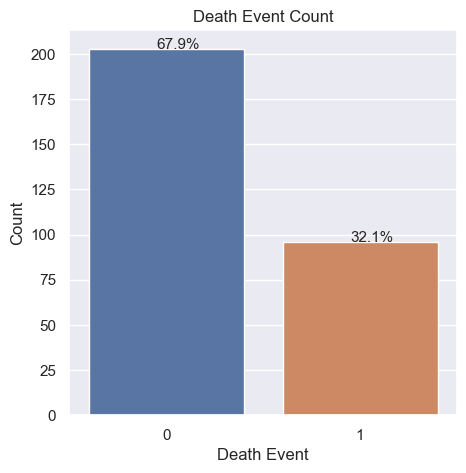

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(df, x='death')
plt.title('Death Event Count')
plt.xlabel('Death Event')
plt.ylabel('Count')
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 11)
plt.show()

#### Handle Categorical Column

In [40]:
# Handle categorical col
X_train_smotenc = X_train_cat.copy()
X_train_smotenc['sex'] = X_train_smotenc['sex'].apply(lambda x: 'Male' if x == 1 else 'Female')

In [41]:
# Change numerical value in categorical column to Yes if 1 and No for 0
def replace_values(df):
    for index, row in df.iterrows():
        for column in df.columns:
            if row[column] == 1:
                df.at[index, column] = "Yes"
            elif row[column] == 0:
                df.at[index, column] = "No"
    return df

X_train_smotenc = replace_values(X_train_smotenc).reset_index()
X_train_smotenc = X_train_smotenc.drop('index', axis=1)

#### Concenate X_train_smotenc with scalled X_train

In [42]:
X_train_scaled = pd.DataFrame(X_train_num_scaled, columns= num_cols)
X_train_sm = pd.concat([X_train_smotenc, X_train_scaled], axis=1)
X_train_sm.head()


,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,No,Yes,No,Male,No,0.000000,0.361254,0.285714,0.621073,0.242424,0.523810,0.508961
1,Yes,No,Yes,Male,Yes,0.361905,0.084160,0.571429,0.775524,0.363636,0.666667,0.412186
2,No,No,No,Male,No,0.857143,0.150060,0.438095,0.314791,0.242424,0.523810,0.648746
3,No,No,Yes,Male,Yes,0.419048,0.165145,0.190476,0.490183,0.242424,0.714286,0.014337
4,No,Yes,Yes,Female,No,0.571429,0.051608,0.380952,0.445681,0.424242,0.333333,0.749104


#### SMOTENC Definition

In [43]:
# Identify categorical indices
categorical_indices = [X_train_sm.columns.get_loc(col) for col in cat_cols]

# Check that all categorical indices are within range
max_index = len(df.columns) - 1
if any(index < 0 or index > max_index for index in categorical_indices):
    raise ValueError('Some of the categorical indices are out of range.')

In [44]:
sm = SMOTENC(categorical_features=categorical_indices, random_state=1)

In [45]:
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_sm, y_train)
X_train_num_new = X_train_balanced[num_cols]

#### Encode Category On Balanced Data

In [46]:
X_train_balanced_cat = X_train_balanced[cat_cols]
ohe.fit(X_train_balanced_cat)

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [47]:
# Assign to Train-set and Test-set
X_train_cat_new = ohe.transform(X_train_balanced_cat)

In [48]:
# Join array for scaled and encoded features
X_train_final_balanced = np.concatenate([X_train_num_new, X_train_cat_new], axis=1)


#### Apply to all model

In [49]:
# base smotenc
model_keys = list(models.keys())
metrics_ = {}
for mod in model_keys:

    model = models[mod]
    model.fit(X_train_final_balanced, y_train_balanced)
    y_pred = model.predict(X_test_final)
    metrics_[mod] = [metrics.accuracy_score(y_test,y_pred),
                         metrics.precision_score(y_test,y_pred),
                         metrics.recall_score(y_test,y_pred),
                         metrics.f1_score(y_test,y_pred)]
balanced_models_result = pd.DataFrame(metrics_,index = ['accuracy','precision','recall','f1'])


In [50]:
# Using Begging
model_keys = list(models.keys())
metrics_ = {}
for mod in model_keys:
    bag_model = BaggingClassifier(models[mod])
    bag_model.fit(X_train_final_balanced, y_train_balanced)
    y_pred = bag_model.predict(X_test_final)
    metrics_[mod] = [metrics.accuracy_score(y_test,y_pred),
                         metrics.precision_score(y_test,y_pred),
                         metrics.recall_score(y_test,y_pred),
                         metrics.f1_score(y_test,y_pred)]
bag_balanced_models_result = pd.DataFrame(metrics_,index = ['accuracy','precision','recall','f1'])

## 9. Model Evaluation

In [51]:
print('original data\n'.upper())
display(base_models_result)
print('\nbalanced data\n'.upper())
display(balanced_models_result)
print('original data with bagging\n'.upper())
display(bag_base_models_result)
print('\nbalanced data with bagging\n'.upper())
display(bag_balanced_models_result)

ORIGINAL DATA



,RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
accuracy,0.833333,0.833333,0.850000
precision,0.764706,0.695652,0.727273
recall,0.684211,0.842105,0.842105
f1,0.722222,0.761905,0.780488



BALANCED DATA



,RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
accuracy,0.783333,0.783333,0.816667
precision,0.625000,0.615385,0.681818
recall,0.789474,0.842105,0.789474
f1,0.697674,0.711111,0.731707


ORIGINAL DATA WITH BAGGING



,RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
accuracy,0.850000,0.833333,0.883333
precision,0.777778,0.714286,0.833333
recall,0.736842,0.789474,0.789474
f1,0.756757,0.750000,0.810811



BALANCED DATA WITH BAGGING



,RandomForestClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier
accuracy,0.783333,0.766667,0.816667
precision,0.625000,0.600000,0.666667
recall,0.789474,0.789474,0.842105
f1,0.697674,0.681818,0.744186


since we are looking for the true positive or the highest recall value, we will be taking `HistGradientBoostingClassifier` with `bagging` and `SMOTENC`

## 10. Save Model

In [52]:
#creating transformer dictionary
encode = {
    'ohe' :OneHotEncoder(handle_unknown= 'ignore',sparse=False)
}
#creating scaler dictionary
scalers = {
    'MinMaxScaler' :MinMaxScaler()
}

In [53]:
# convert non-pandas DataFrame to pandas DataFrame
ct = mct(
    (encode['ohe'],cat_cols),
    (scalers['MinMaxScaler'],num_cols)
)

# Define pipeline
pipe = Pipeline([
        ('ct',ct),
        ('bagging', ibp([
            ('hgb', HistGradientBoostingClassifier(random_state=42))
        ]))
])

# fit the pipeline with SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
pipe_final = ibp([
    ('hgb', HistGradientBoostingClassifier(random_state=42))
])
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('hgb', HistGradientBoostingClassifier(random_state=42))])

In [54]:
# Saving pipeline as pipeline.pkl
with open ('pipeline.pkl', 'wb') as file_1:
    joblib.dump(pipe_final, file_1)

with open('list_num_cols.txt', 'w') as file_2:
    json.dump(num_cols, file_2)

with open('list_cat_cols.txt', 'w') as file_3:
    json.dump(cat_cols, file_3)


## 11. Inference

In [55]:
df_inf = df[df.columns[:-1]].sample(1,random_state = 42)
display(df_inf)

# predict
pipeline = joblib.load('pipeline.pkl')
pred = pipeline.predict(df_inf)
if pred.any() == 1:
    print('potentially die from a heart failure')
else:
    print('probably safe from dying because of a heart failure')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10


potentially die from a heart failure


## 12. Conclusion

The given data contains information on 299 patients, including their age, medical conditions, and other parameters. The analysis shows that anaemia, diabetes, hypertension, male gender, and smoking are significant risk factors for CVD-related deaths. Healthcare providers and patients should be aware of these risk factors and take appropriate steps to manage them to reduce the likelihood of developing CVDs and related complications. The distribution of each feature in the dataset is fairly normal, and each of the numerical features appears to be less correlated to each other. However, age and serum_creatine are positively correlated towards the target, indicating that the higher the age or the serum_creatine, the higher the possibility of someone dying of heart disease. To increase the recall value or true positives, the report suggests using `HistGradientBoostingClassifier` with `bagging` and `SMOTENC`. Even so the I am aware that the model is have low precision meanung that the model have lower precision in detecting the poeple with heart disease but detected as non-heart disease. 


Improving both recall and accuracy at the same time can be challenging because there is often a trade-off between the two metrics. In general, increasing one may lead to a decrease in the other. However, there are some strategies we can try to improve both at the same time:

- Collect more data: Increasing the size of the dataset may help to improve both recall and accuracy. With more data, the model can better learn the patterns and relationships within the data, resulting in better performance on both metrics.

- Feature engineering: By creating new features or transforming existing ones, you can potentially improve both recall and accuracy. This involves analyzing the data to identify new features that may be relevant to the problem at hand, or transforming existing features to better capture the underlying patterns in the data.

- Model selection and tuning: exploring more model will get we the higher chance to find the right model and hyperparameters that also impact both recall and accuracy. Different models have different strengths and weaknesses, and tuning the hyperparameters can help to optimize the performance on both metrics.

It's important to note that not all of these strategies will work in every situation and the best approach may depend on the specific problem at hand.

### CONCEPTUAL PROBLEMS

1. Bagging is a machine learning technique that is used to reduce the variance of a model by combining the outputs of multiple models. It is used to improve the accuracy of models that tend to overfit the data. Bagging stands for Bootstrap Aggregating, which means that it generates multiple bootstrapped samples of the training data and trains a model on each sample. Then, it combines the outputs of all the models to generate a final prediction.

    The main idea behind bagging is to generate multiple models that are diverse and independent of each other, so that they can collectively produce a more accurate prediction. This is achieved by randomly selecting subsets of the training data for each model and using a different random subset of the features for each model. By doing so, we can create multiple models that are different from each other and that can capture different patterns in the data.

2. Random Forest, Gradient Boosting Classifier, and HistGradientBoostingClassifier are all ensemble methods that use the concept of bagging to improve the accuracy of the models.

    * Random Forest is a bagging technique that uses decision trees as base estimators. It randomly selects subsets of the features and training data for each decision tree, and then aggregates the outputs of all the trees to generate a final prediction. The difference between Random Forest and a regular decision tree is that Random Forest reduces overfitting by generating multiple decision trees that are independent of each other.

    * Gradient Boosting Classifier is a boosting technique that uses decision trees as base estimators. Unlike bagging, which generates multiple models in parallel, boosting generates models in a sequential manner. It starts by fitting a weak model to the data, and then fits a new model to the residuals of the first model. It repeats this process until the residuals become small enough, and then combines the outputs of all the models to generate a final prediction. The main advantage of Gradient Boosting is that it is able to capture non-linear relationships between the features and the target variable.

    * HistGradientBoostingClassifier is a variation of Gradient Boosting that uses histogram-based algorithms to speed up the training process. It discretizes the continuous features into discrete bins, and then builds histograms for each feature to speed up the calculation of gradients. This makes it faster than regular Gradient Boosting, especially for large datasets.

## 13. Reference

- https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25
- https://datascience.stackexchange.com/questions/76470/using-smotenc-in-a-pipeline
- https://www.datasciencecentral.com/decision-tree-vs-random-forest-vs-boosted-trees-explained/
- https://www.baeldung.com/cs/gradient-boosting-trees-vs-random-forests
- https://towardsdatascience.com/the-precision-recall-tradeoff-2926ce73f1ec
- https://www.quora.com/Why-is-it-difficult-to-achieve-high-accuracy-and-recall-at-the-same-time


